# Compare Performance of CPU and GPU with ANN image classification
#### versions information: python 3.7.6, tensorflow 2.4.0, cuDNN v8.1.0, CUDA 11.2

In [5]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [1]:
import tensorflow as tf
tf.__version__

'2.4.0'

In [4]:
print(tf.test.is_built_with_cuda())

True


In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [7]:
X_train.shape

(50000, 32, 32, 3)

In [8]:
y_train.shape

(50000, 1)

In [11]:
def plot_img(index):
    plt.figure(figsize=(10,1))
    plt.imshow(X_train[index])

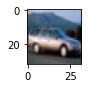

In [12]:
plot_img(4)

In [13]:
# define classes

classes = ['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

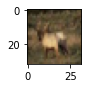

In [14]:
plot_img(3)

In [15]:
y_train[3]

array([4], dtype=uint8)

In [16]:
classes[y_train[3][0]]

'deer'

In [17]:
# scale images
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [18]:
# convert discrete y to categorical using one hot encoding
y_train_categorical = keras.utils.to_categorical(y_train, num_classes=10, dtype='float32')
y_train_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
y_test_categorical = keras.utils.to_categorical(y_test, num_classes=10, dtype='float32')
y_test_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [21]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

# categorical_crossentropy used for one hot encoded categories
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 11s 6ms/step - loss: 1.9323 - accuracy: 0.3025
Epoch 2/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6474 - accuracy: 0.4175
Epoch 3/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5537 - accuracy: 0.4527
Epoch 4/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4843 - accuracy: 0.4775
Epoch 5/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4348 - accuracy: 0.4953
Epoch 6/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3855 - accuracy: 0.5128
Epoch 7/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3597 - accuracy: 0.5219
Epoch 8/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3101 - accuracy: 0.5398
Epoch 9/50
1563/1563 [==============================] - 10s 7ms/step - loss: 1.2866 - accuracy: 0.5471
Epoch 10/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1

In [25]:
# model predicted
classes[np.argmax(model.predict(X_test_scaled)[0])]

'cat'

In [24]:
# true value
classes[y_test[0][0]]

'cat'

In [26]:
# model predicted
classes[np.argmax(model.predict(X_test_scaled)[1])]

'ship'

In [27]:
# true value
classes[y_test[1][0]]

'ship'

In [28]:
# accuracy of the model
model.evaluate(X_test_scaled, y_test_categorical)

313/313 [==============================] - 1s 3ms/step - loss: 1.5185 - accuracy: 0.5737


[1.5185467004776, 0.5737000107765198]

In [29]:
# Perfomance test

In [30]:
def get_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32, 32, 3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')
    ])

    model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# training time on CPU with 1 epoch

In [34]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 55s 35ms/step - loss: 1.9301 - accuracy: 0.3054
1 loop, best of 1: 55.1 s per loop


# Training time on GPU with one epoch

In [35]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 10s 6ms/step - loss: 1.9309 - accuracy: 0.3044
1 loop, best of 1: 10.9 s per loop


# Train time on CPU with 10 epochs

In [36]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 46s 29ms/step - loss: 1.9297 - accuracy: 0.3018
Epoch 2/10
1563/1563 [==============================] - 49s 32ms/step - loss: 1.6487 - accuracy: 0.4172
Epoch 3/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.5586 - accuracy: 0.4513
Epoch 4/10
1563/1563 [==============================] - 49s 32ms/step - loss: 1.4855 - accuracy: 0.4763
Epoch 5/10
1563/1563 [==============================] - 48s 31ms/step - loss: 1.4369 - accuracy: 0.4954
Epoch 6/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.3939 - accuracy: 0.5121
Epoch 7/10
1563/1563 [==============================] - 51s 33ms/step - loss: 1.3446 - accuracy: 0.5284
Epoch 8/10
1563/1563 [==============================] - 48s 30ms/step - loss: 1.3148 - accuracy: 0.5388
Epoch 9/10
1563/1563 [==============================] - 49s 31ms/step - loss: 1.2868 - accuracy: 0.5501
Epoch 10/10
1563/1563 [==============================] - 47s 30m

# training time on GPU with 10 epochs (NVIDIA GeForce 1650)

In [37]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.9392 - accuracy: 0.3007
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6498 - accuracy: 0.4174
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5595 - accuracy: 0.4486
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4887 - accuracy: 0.4744
Epoch 5/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.4468 - accuracy: 0.4896
Epoch 6/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.4017 - accuracy: 0.5046
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3521 - accuracy: 0.5269
Epoch 8/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3166 - accuracy: 0.5357
Epoch 9/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2831 - accuracy: 0.5486
Epoch 10/10
1563/1563 [==============================] - 10s 6ms/step - l